Nome: Geovanni Fernandes Garcia,

N°USP: 11298560

In [ ]:
# importando as bibliotecas
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def henon_map(q1_0,q2_0,p1_0,p2_0,dt,t):
    # esta função calcula o mapa de Henon para as variáveis q1, q2, p1 e p2
    # q1_0, q2_0, p1_0 e p2_0 são os valores iniciais das variáveis
    # dt é o passo de tempo
    # t é o tempo total da simulação
    # a função retorna um array com os valores das variáveis em cada instante de tempo

    # criando um array com os instantes de tempo
    tempo=np.arange(0,t,dt)

    # criando arrays vazios para armazenar os valores das variáveis
    q1=np.zeros(len(tempo))
    q2=np.zeros(len(tempo))
    p1=np.zeros(len(tempo))
    p2=np.zeros(len(tempo))

    # atribuindo os valores iniciais aos arrays
    q1[0]=q1_0
    q2[0]=q2_0
    p1[0]=p1_0
    p2[0]=p2_0

    # usando um loop for para iterar sobre os instantes de tempo
    for n in range(1,len(tempo),1):
        # aplicando as equações do mapa de Henon para cada variável
        q1[n] = q1[n-1] + dt*p1[n-1]
        q2[n] = q2[n-1] + dt*p2[n-1]
        p1[n] = p1[n-1] - dt*(q1[n] + 2*q1[n]*q2[n])
        p2[n] = p2[n-2] - dt*(q2[n] + q1[n]**2 - q2[n]**2)

    # retornando um array com os valores das variáveis em cada instante de tempo
    return np.array([tempo,q1,q2,p1,p2])

def henon_inter(q_p_array,inter):
    # esta função encontra os índices dos pontos de interseção entre a variável q1 e um valor constante inter
    # q_p_array é o array com os valores das variáveis obtidos pela função henon_map
    # inter é o valor constante que queremos encontrar a interseção com q1
    # a função retorna uma lista com os índices dos pontos de interseção

    # atribuindo o array q_p_array a uma variável local
    recebe_q_p=q_p_array

    # criando uma lista vazia para armazenar os índices dos pontos de interseção
    ide_n = []

    # usando um loop for para iterar sobre os valores de x1
    for n in range(0,len(recebe_q_p[0])-1,1):
        # verificando se há uma mudança de sinal entre dois valores consecutivos de x1 - inter
        if (recebe_q_p[1][n]-inter)*(recebe_q_p[1][n+1]-inter) <= 0:
            # verificando se o valor de y1 é positivo (para evitar duplicidade)
            if recebe_q_p[3][n]>=0:
                # adicionando o índice do ponto de interseção à lista
                ide_n.append(n)

    # retornando a lista com os índices dos pontos de interseção
    return ide_n

def henon_poincare(q_p_array,inter):
    # esta função calcula o mapa de Poincaré para o mapa de Henon usando a interseção entre q1 e um valor constante inter
    # q_p_array é o array com os valores das variáveis obtidos pela função henon_map
    # inter é o valor constante que queremos encontrar a interseção com q1
    # a função retorna um array com os valores das variáveis nos pontos de interseção

    # obtendo os índices dos pontos de interseção pela função henon_inter
    inter_n = henon_inter(q_p_array,inter)

    # atribuindo as variáveis do array q_p_array a variáveis locais
    q1 = q_p_array[1]
    q2 = q_p_array[2]
    p1 = q_p_array[3]
    p2 = q_p_array[4]

    # criando listas vazias para armazenar os valores das variáveis nos pontos de interseção
    q1_inter = []
    q2_inter = []
    p1_inter = []
    p2_inter = []
    t_inter = []

    # usando um loop for para iterar sobre os índices dos pontos de interseção
    for n in inter_n:
        # usando interpolação linear para estimar os valores das variáveis nos pontos de interseção
        q2_inter.append(q2[n-1] + (inter - q1[n-1])*p1[n-1]/p2[n-1])
        p1_inter.append(p1[n-1] - (inter - q1[n-1])*(q1[n] + 2*q1[n]*q2[n])/p2[n-1])
        p2_inter.append(p2[n-1] - (inter - q1[n-1])*(q2[n] + q1[n]**2 - q2[n]**2)/p2[n-1])

        # adicionando o instante de tempo e o valor de inter à lista
        t_inter.append(q_p_array[0][n])
        q1_inter.append(inter)

    # retornando um array com os valores das variáveis nos pontos de interseção
    return np.array([t_inter,q1_inter,q2_inter,p1_inter,p2_inter])

In [ ]:
# definindo uma lista com os valores de q1 e q2 para um ponto fixo
ponto_fixo = [-0.26604444,0.32635182,1.43969262]

# calculando o mapa de Poincare para diferentes valores iniciais de q1 e q2 usando a função henon_poicare
# cada mapa é armazenado em uma variável com o nome H seguido do valor de inter e do número do mapa
H_08333_1 = henon_poincare(henon_map(0.00001,np.cbrt(0.25),0,0,0.0001,500),0)
H_08333_2 = henon_poincare(henon_map(np.sqrt(1/6),0,0,0,0.0001,500),0)
H_08333_3 = henon_poincare(henon_map(ponto_fixo[0],ponto_fixo[0],0,0,0.0001,500),0)
H_08333_4 = henon_poincare(henon_map(ponto_fixo[1],ponto_fixo[1],0,0,0.0001,500),0)
H_125_1 = henon_poincare(henon_map(0.778,-0.425,0,0,0.0001,500),0)
H_125_2 = henon_poincare(henon_map(0.568,0,0,0,0.0001,500),0)
H_125_3 = henon_poincare(henon_map(0.00001,0.892,0,0,0.0001,500),0)
H_125_4 = henon_poincare(henon_map(0.2,0.634,0,0,0.0001,500),0)

Text(0, 0.5, 'p2')

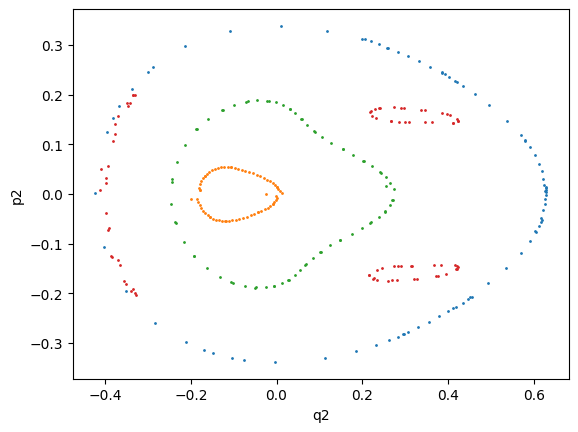

In [ ]:
# plotando os mapas de Poincaré em um gráfico de dispersão usando a função plt.scatter
# cada mapa tem uma cor diferente para facilitar a visualização
# os eixos x e y representam as variáveis q2 e p2 respectivamente

plt.scatter(H_08333_1[2],H_08333_1[4],1)
plt.scatter(H_08333_2[2],H_08333_2[4],1)
plt.scatter(H_08333_3[2],H_08333_3[4],1)
plt.scatter(H_08333_4[2],H_08333_4[4],1)
plt.xlabel('q2')
plt.ylabel('p2')

Text(0, 0.5, 'p2')

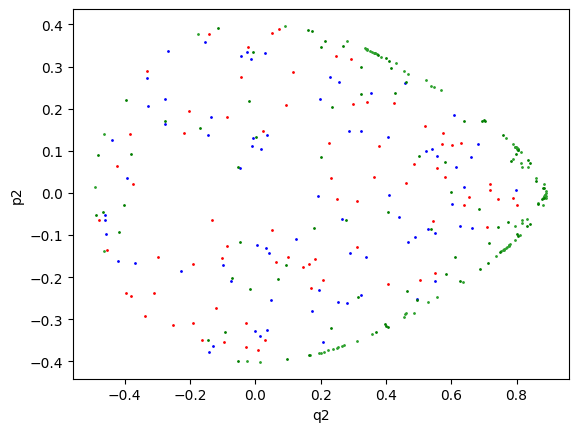

In [ ]:
plt.scatter(H_125_1[2],H_125_1[4],1,edgecolors='r')
plt.scatter(H_125_2[2],H_125_2[4],1,edgecolors='b')
plt.scatter(H_125_3[2],H_125_3[4],1)
plt.scatter(H_125_4[2],H_125_4[4],1,edgecolors='g')
plt.xlabel('q2')
plt.ylabel('p2')

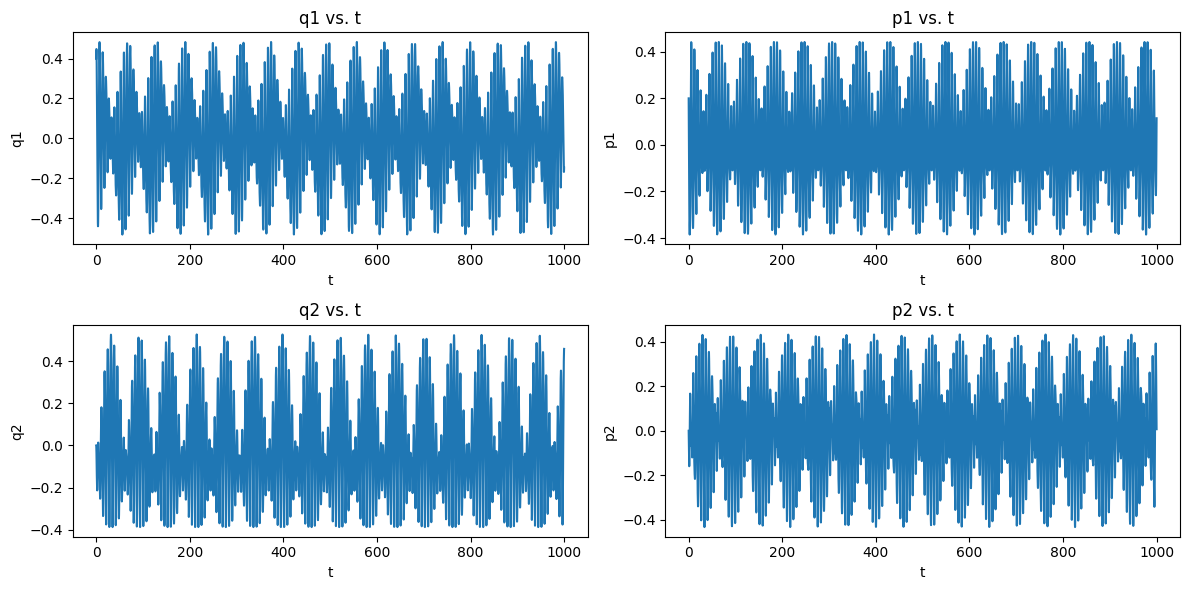

In [ ]:
# Escolhendo uma condição inicial correspondente a uma trajetória periódica na seção de Poincaré com E = 0.125
condicao_inicial_periodica = [0.4, 0.2, 0, 0]  # Exemplo de condição inicial para trajetória periódica

# Calculando as curvas q1, p1, q2 e p2 em função do tempo usando o método de Euler simplético
dt = 0.0001
t_total = 1000

q1 = [condicao_inicial_periodica[0]]
p1 = [condicao_inicial_periodica[1]]
q2 = [condicao_inicial_periodica[2]]
p2 = [condicao_inicial_periodica[3]]
tempo = [0]

for t in np.arange(dt, t_total, dt):
    q1_n = q1[-1] + dt * p1[-1]
    q2_n = q2[-1] + dt * p2[-1]
    p1_n = p1[-1] - dt * (q1_n + 2 * q1_n * q2_n)
    p2_n = p2[-1] - dt * (q2_n + q1_n**2 - q2_n**2)

    q1.append(q1_n)
    q2.append(q2_n)
    p1.append(p1_n)
    p2.append(p2_n)
    tempo.append(t)

# Plotando as curvas q1, p1, q2 e p2 em função do tempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(tempo, q1)
plt.xlabel('t')
plt.ylabel('q1')
plt.title('q1 vs. t')

plt.subplot(2, 2, 2)
plt.plot(tempo, p1)
plt.xlabel('t')
plt.ylabel('p1')
plt.title('p1 vs. t')

plt.subplot(2, 2, 3)
plt.plot(tempo, q2)
plt.xlabel('t')
plt.ylabel('q2')
plt.title('q2 vs. t')

plt.subplot(2, 2, 4)
plt.plot(tempo, p2)
plt.xlabel('t')
plt.ylabel('p2')
plt.title('p2 vs. t')

plt.tight_layout()
plt.show()

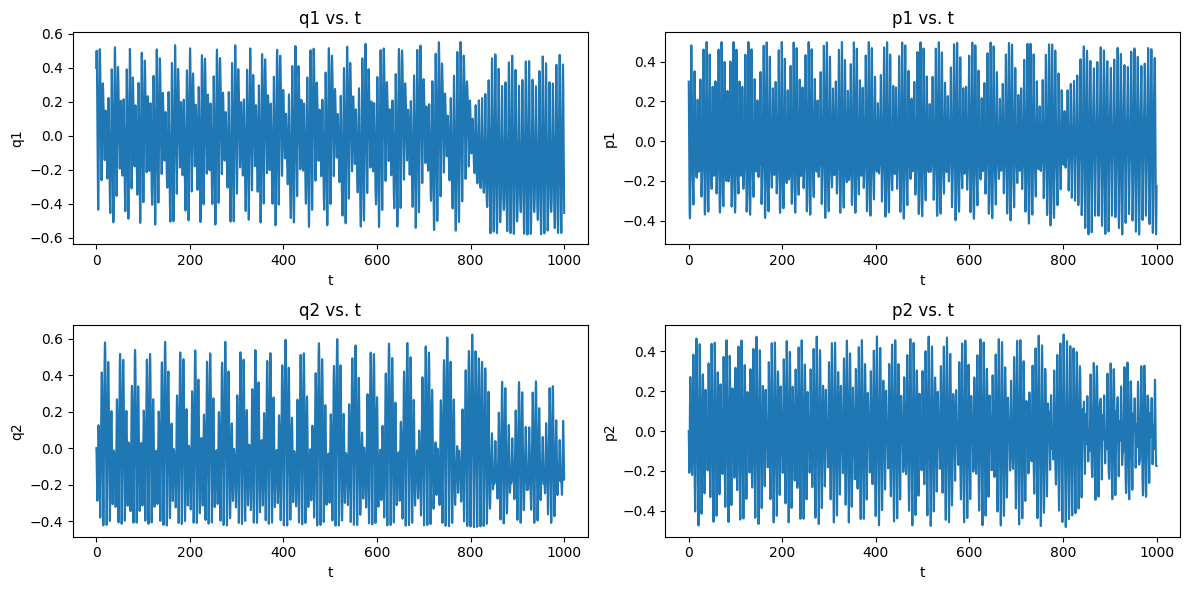

In [ ]:
# Escolhendo uma condição inicial correspondente a uma trajetória caótica na seção de Poincaré com E = 0.125
condicao_inicial_caotica = [0.4, 0.3, 0, 0]  # Exemplo de condição inicial para trajetória caótica

# Calculando as curvas q1, p1, q2 e p2 em função do tempo usando o método de Euler simplético
dt = 0.0001
t_total = 1000

q1 = [condicao_inicial_caotica[0]]
p1 = [condicao_inicial_caotica[1]]
q2 = [condicao_inicial_caotica[2]]
p2 = [condicao_inicial_caotica[3]]
tempo = [0]

for t in np.arange(dt, t_total, dt):
    q1_n = q1[-1] + dt * p1[-1]
    q2_n = q2[-1] + dt * p2[-1]
    p1_n = p1[-1] - dt * (q1_n + 2 * q1_n * q2_n)
    p2_n = p2[-1] - dt * (q2_n + q1_n**2 - q2_n**2)

    q1.append(q1_n)
    q2.append(q2_n)
    p1.append(p1_n)
    p2.append(p2_n)
    tempo.append(t)

# Plotando as curvas q1, p1, q2 e p2 em função do tempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(tempo, q1)
plt.xlabel('t')
plt.ylabel('q1')
plt.title('q1 vs. t')

plt.subplot(2, 2, 2)
plt.plot(tempo, p1)
plt.xlabel('t')
plt.ylabel('p1')
plt.title('p1 vs. t')

plt.subplot(2, 2, 3)
plt.plot(tempo, q2)
plt.xlabel('t')
plt.ylabel('q2')
plt.title('q2 vs. t')

plt.subplot(2, 2, 4)
plt.plot(tempo, p2)
plt.xlabel('t')
plt.ylabel('p2')
plt.title('p2 vs. t')

plt.tight_layout()
plt.show()